## Dependencies

In [22]:
import pandas as pd
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings("ignore")

## Data Extraction

In [23]:
import pandas as pd
import os

# Load Excel file
merged_path = os.path.join("..", "data", "indonesia", "merged_indonesia.xlsx")
df = pd.read_excel(merged_path)

# Clean column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Rename for clarity
df = df.rename(columns={
    "cpi_data": "inflation_rate",
    "manufacturing_(%_age_of_gdp)": "manufacturing_output",
    "trade_balance_(%_age_of_gdp)": "trade_deficit",
    "tariff_rate": "tariff"
})

# Preview the dataframe
print(df)


   year  inflation_rate  manufacturing_output  trade_deficit  tariff
0  2014             6.4                0.2108        -0.0075  0.0250
1  2015             6.4                0.2099         0.0038  0.0210
2  2016             3.5                0.2052         0.0076  0.0264
3  2017             3.8                0.2016         0.0100  0.0206
4  2018             3.2                0.1986        -0.0107  0.0200
5  2019             2.8                0.1970        -0.0044  0.0200
6  2020             2.0                0.1987         0.0169  0.0204
7  2021             1.6                0.1924         0.0263  0.0183
8  2022             4.2                0.1834         0.0354  0.0000
9  2023             3.7                0.1867         0.0218  0.0000


## Defining The Variables

In [24]:
# Independent variable (X)
X = df[["tariff"]]

# Dependent variables (Y)
y_inflation = df["inflation_rate"]
y_manufacturing = df["manufacturing_output"]
y_trade_balance = df["trade_deficit"]


## Statistical Analysis

In [25]:
model_inflation = LinearRegression().fit(X, y_inflation)
model_manufacturing = LinearRegression().fit(X, y_manufacturing)
model_trade_balance = LinearRegression().fit(X, y_trade_balance)


In [26]:
print("Inflation Model:")
print("Coefficient:", model_inflation.coef_)
print("Intercept:", model_inflation.intercept_)

print("\nManufacturing Output Model:")
print("Coefficient:", model_manufacturing.coef_)
print("Intercept:", model_manufacturing.intercept_)

print("\nTrade Balance Model:")
print("Coefficient:", model_trade_balance.coef_)
print("Intercept:", model_trade_balance.intercept_)


Inflation Model:
Coefficient: [12.10708596]
Intercept: 3.552121334057128

Manufacturing Output Model:
Coefficient: [0.8403454]
Intercept: 0.18400126954842644

Trade Balance Model:
Coefficient: [-1.11387469]
Intercept: 0.029045228342829944


In [27]:
X_sm = sm.add_constant(X)  # Adds intercept term manually

model_inf = sm.OLS(y_inflation, X_sm).fit()
print(model_inf.summary())

model_manu = sm.OLS(y_manufacturing, X_sm).fit()
print(model_manu.summary())

model_trade = sm.OLS(y_trade_balance, X_sm).fit()
print(model_trade.summary())


                            OLS Regression Results                            
Dep. Variable:         inflation_rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.119
Method:                 Least Squares   F-statistic:                   0.04014
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.846
Time:                        21:08:16   Log-Likelihood:                -18.373
No. Observations:                  10   AIC:                             40.75
Df Residuals:                       8   BIC:                             41.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5521      1.168      3.040      0.0

## Plots

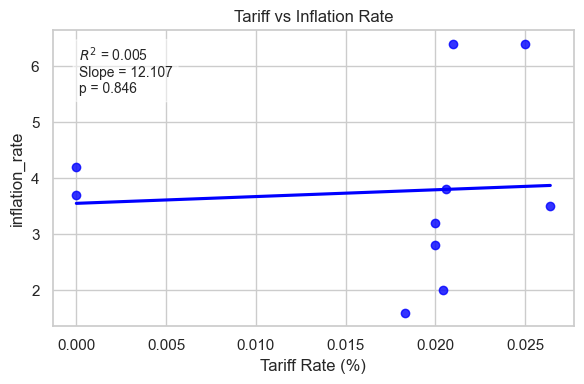

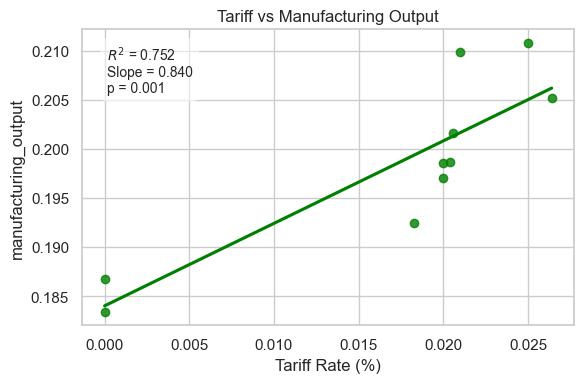

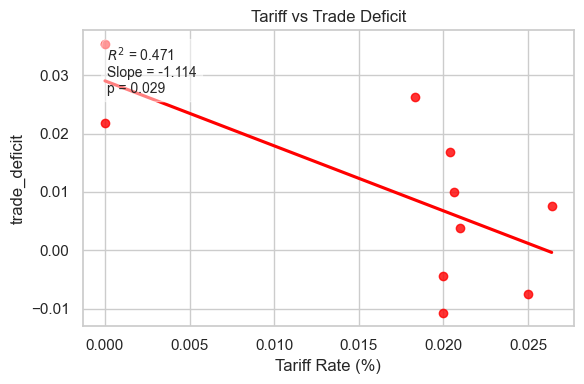

In [28]:
# Function to plot regression with annotations
def regression_plot(x, y, data, title, color):
    X = sm.add_constant(data[[x]])
    y_vals = data[y]
    
    model = sm.OLS(y_vals, X).fit()
    pred = model.predict(X)
    
    r_squared = model.rsquared
    p_val = model.pvalues[1]  # coefficient's p-value
    slope = model.params[1]
    
    # Create a new figure for each plot
    plt.figure(figsize=(6, 4))
    sns.set_theme(style="whitegrid")
    ax = sns.regplot(x=x, y=y, data=data, ci=None, color=color)
    ax.set_title(title)
    ax.set_xlabel("Tariff Rate (%)")
    ax.set_ylabel(y)

    # Add text box with stats
    textstr = f"$R^2$ = {r_squared:.3f}\nSlope = {slope:.3f}\np = {p_val:.3f}"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

# Call for each graph individually
regression_plot("tariff", "inflation_rate", df, "Tariff vs Inflation Rate", "blue")
regression_plot("tariff", "manufacturing_output", df, "Tariff vs Manufacturing Output", "green")
regression_plot("tariff", "trade_deficit", df, "Tariff vs Trade Deficit", "red")
